In [1]:
# Import necessary libraries
import numpy as np  # Importing NumPy for numerical operations
from sklearn.datasets import fetch_openml  # Importing function to fetch dataset
from sklearn.model_selection import train_test_split  # Importing function to split data
from sklearn.svm import SVC  # Importing Support Vector Classifier
from sklearn.metrics import accuracy_score  # Importing function to calculate accuracy


# Load MNIST dataset
mnist = fetch_openml('mnist_784', version=1)  # Loading MNIST dataset
X, y = mnist['data'], mnist['target']  # Separating features and labels

# Convert string labels to integers
y = y.astype(np.uint8)  # Converting label data type to unsigned 8-bit integers

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # Splitting data into train and test sets

# Scale the features
X_train_scaled = X_train / 255.0  # Scaling training features
X_test_scaled = X_test / 255.0  # Scaling testing features

# Initialize SVM classifier
svm_clf = SVC(kernel='rbf', gamma='scale', random_state=42)  # Initializing Support Vector Classifier with Radial Basis Function kernel

# Train the SVM classifier
svm_clf.fit(X_train_scaled, y_train)  # Training the Support Vector Classifier

# Make predictions on the test set
y_pred = svm_clf.predict(X_test_scaled)  # Making predictions on the scaled test set

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)  # Calculating accuracy of predictions
print("Accuracy:", accuracy)  # Printing the accuracy


/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


Accuracy: 0.9764285714285714


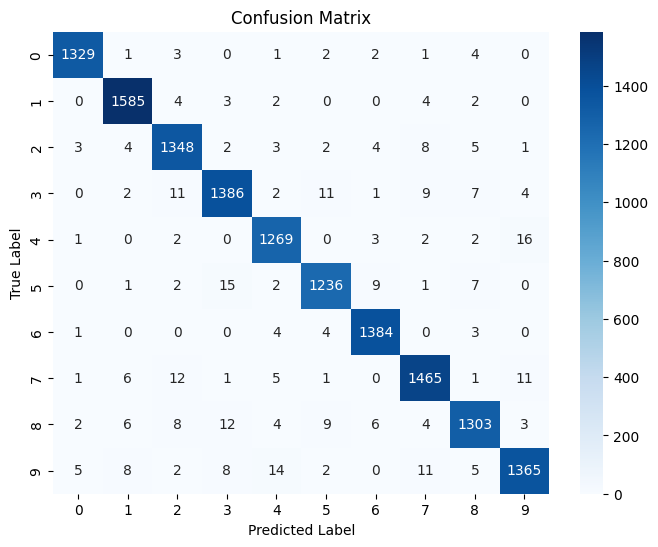

In [2]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()
